# Forecasting Revenue for Anthropic
This notebook explores time series forecasting methodologies to estimate revenue trends for Anthropic’s AI services. We simulate data to demonstrate models commonly used in financial forecasting (ARIMA, Prophet, neural networks), as referenced in the job posting.

The objective is to:
- Compare statistical vs machine learning forecasting methods
- Understand model behavior under rapid scaling scenarios
- Showcase modeling approaches suitable for high-growth AI companies


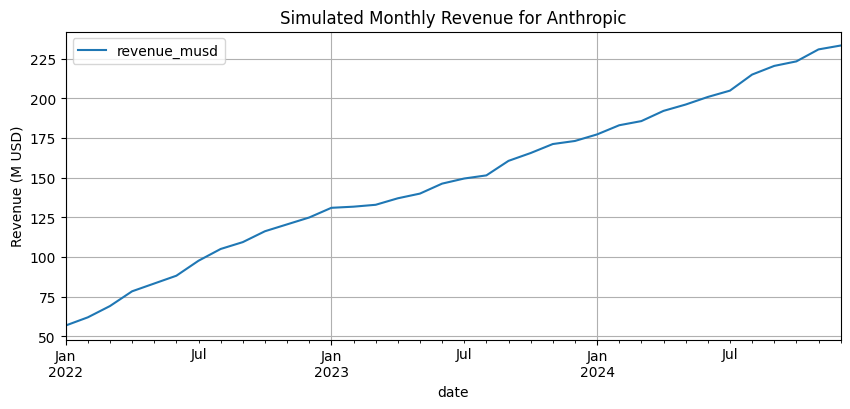

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create 36 months of synthetic revenue data
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=36, freq='ME')
revenue = np.cumsum(np.random.normal(loc=5.5, scale=2.5, size=36)) + 50
df = pd.DataFrame({'date': months, 'revenue_musd': revenue})
df.set_index('date', inplace=True)

# Plot
df.plot(title="Simulated Monthly Revenue for Anthropic", figsize=(10, 4))
plt.ylabel("Revenue (M USD)")
plt.grid(True)
plt.show()


We simulate monthly revenue data to mimic early-stage exponential growth and noise. This synthetic dataset provides a foundation for exploring forecasting models.

C:\Users\philb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\philb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\philb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


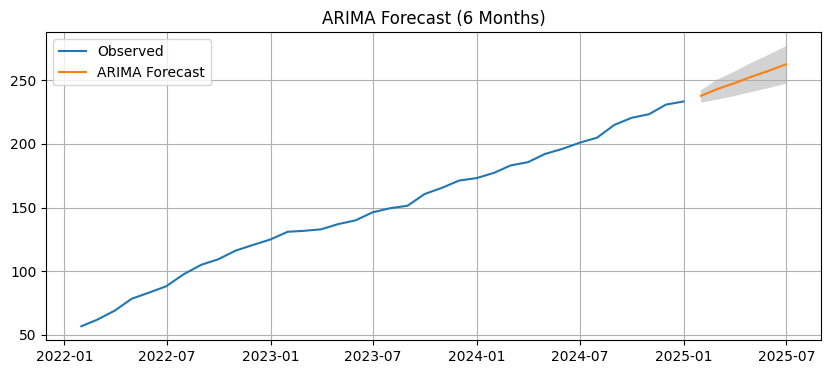

In [2]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['revenue_musd'], order=(2,1,2))
fitted = model.fit()
forecast = fitted.get_forecast(steps=6)
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(10,4))
plt.plot(df.index, df['revenue_musd'], label='Observed')
future_dates = pd.date_range(df.index[-1] + pd.offsets.MonthEnd(), periods=6, freq='ME')
plt.plot(future_dates, forecast.predicted_mean, label='ARIMA Forecast')
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgrey')
plt.title("ARIMA Forecast (6 Months)")
plt.legend()
plt.grid(True)
plt.show()

ARIMA is a foundational time series model. We use a simple ARIMA(2,1,2) to forecast the next 6 months of revenue, with confidence intervals shown.

08:25:36 - cmdstanpy - INFO - Chain [1] start processing
08:25:37 - cmdstanpy - INFO - Chain [1] done processing


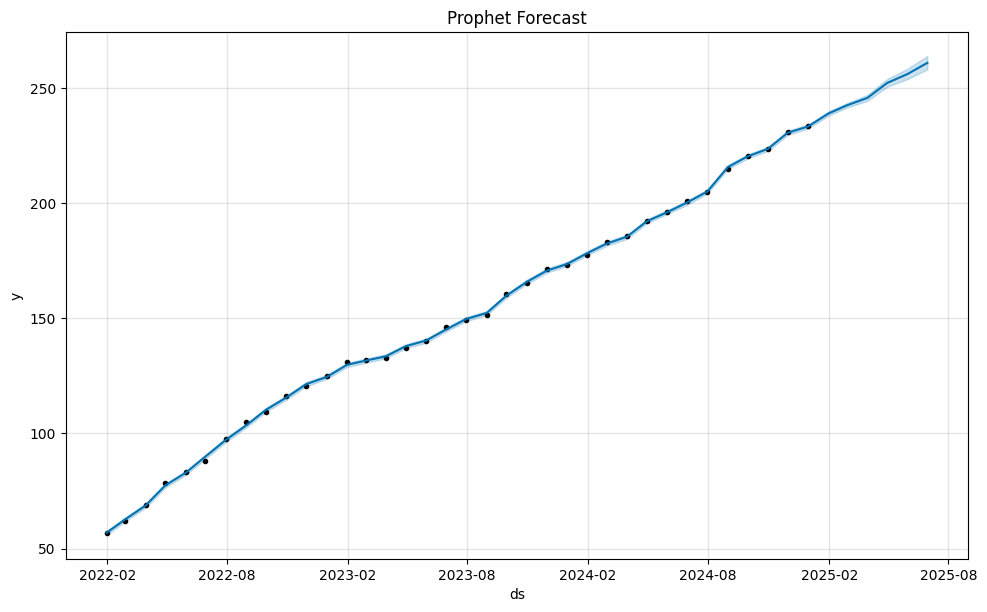

In [5]:
from prophet import Prophet

df_prophet = df.reset_index().rename(columns={"date": "ds", "revenue_musd": "y"})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

Meta's Prophet model allows automatic trend and seasonality detection. It works well for business forecasting and is easy to scale.

For more complex modeling, neural forecasting (e.g., LSTM, N-BEATS) can be used, particularly when dealing with multi-series data or non-linear regime shifts.

We skip implementation here but note that libraries like `NeuralForecast`, `GluonTS`, or `Darts` are popular options.

📌 Example tools:
- [https://github.com/Nixtla/neuralforecast](https://github.com/Nixtla/neuralforecast)
- [https://github.com/unit8co/darts](https://github.com/unit8co/darts)


### Forecasting Method Comparison

| Model        | Pros                                         | Cons                                      |
|--------------|----------------------------------------------|-------------------------------------------|
| ARIMA        | Interpretable, statistically grounded        | Requires stationarity, manual tuning      |
| Prophet      | Easy to use, flexible with seasonality       | Assumes additive trends                   |
| Neural Net   | Handles complex nonlinearities               | Requires more data and tuning             |

For an early-stage company like Anthropic, ARIMA and Prophet provide lightweight, fast modeling to inform GTM and Finance strategies.


## Key Takeaways

- ARIMA and Prophet offer robust short-term forecasting options.
- Neural forecasting becomes valuable when data volume and multivariate relationships increase.
- Revenue forecasting should be part of a broader GTM and finance analytics pipeline to support hiring, compensation, and pricing strategies.
